# Bangalore House Price Analysis

## Overview

This project analyzes property prices in Bangalore, focusing on the price per square foot. The analysis includes exploratory data analysis (EDA), outlier detection and removal, normality checks, correlation analysis, and visualizations. The goal is to understand the distribution of property prices and identify any anomalies in the dataset.

## Dataset

The dataset used for this analysis is `house_price.csv`, which contains various features related to properties in Bangalore, including their prices and sizes. The dataset can be downloaded from the following link:

[Download Dataset](https://drive.google.com/file/d/1UlWRYU0UglE2ex3iFse0J6eCLEU8g98P/view?usp=sharing)

## Requirements

To run this project, you will need the following Python libraries:

- pandas
- numpy
- matplotlib
- seaborn
- scipy
## Results
The results of the analysis, including visualizations and statistical findings, are presented throughout the notebook. The effectiveness of each outlier removal method is evaluated based on the box plots.

## Conclusion
This analysis provides insights into the property prices in Bangalore, highlighting the importance of outlier detection and the impact of data transformations on statistical properties. The findings can be useful for real estate professionals, investors, and researchers interested in the Bangalore housing market.

In [2]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://drive.google.com/uc?id=1UlWRYU0UglE2ex3iFse0J6eCLEU8g98P'
data = pd.read_csv(url)


In [3]:
data.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [4]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [6]:
data.isna().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

### a) Mean and Standard Deviation Method


In [7]:
# identifying outliers

mean=data['price_per_sqft'].mean()
std_dev=data['price_per_sqft'].std()
threshold=3

data_mean_std=data[(data['price_per_sqft']>=mean - threshold * std_dev) & (data['price_per_sqft']<=mean - threshold * std_dev)]

### b) Percentile Method


In [9]:
lower_bound = data['price_per_sqft'].quantile(0.05)
upper_bound = data['price_per_sqft'].quantile(0.95)

data_percentile = data[(data['price_per_sqft'] >= lower_bound) & 
                       (data['price_per_sqft'] <= upper_bound)]

### c) IQR Method


In [10]:
Q1= data['price_per_sqft'].quantile(0.25)
Q3= data['price_per_sqft'].quantile(0.75)

IQR=Q3-Q1

data_iqr=data[(data['price_per_sqft']>=(Q3 - 1.5 *IQR)) & (data['price_per_sqft']>=(Q1 +1.5 * IQR))]

### d) Z Score Method


In [11]:
from scipy import stats

z_scores = np.abs(stats.zscore(data['price_per_sqft']))
data_z_score = data[(z_scores < 3)]

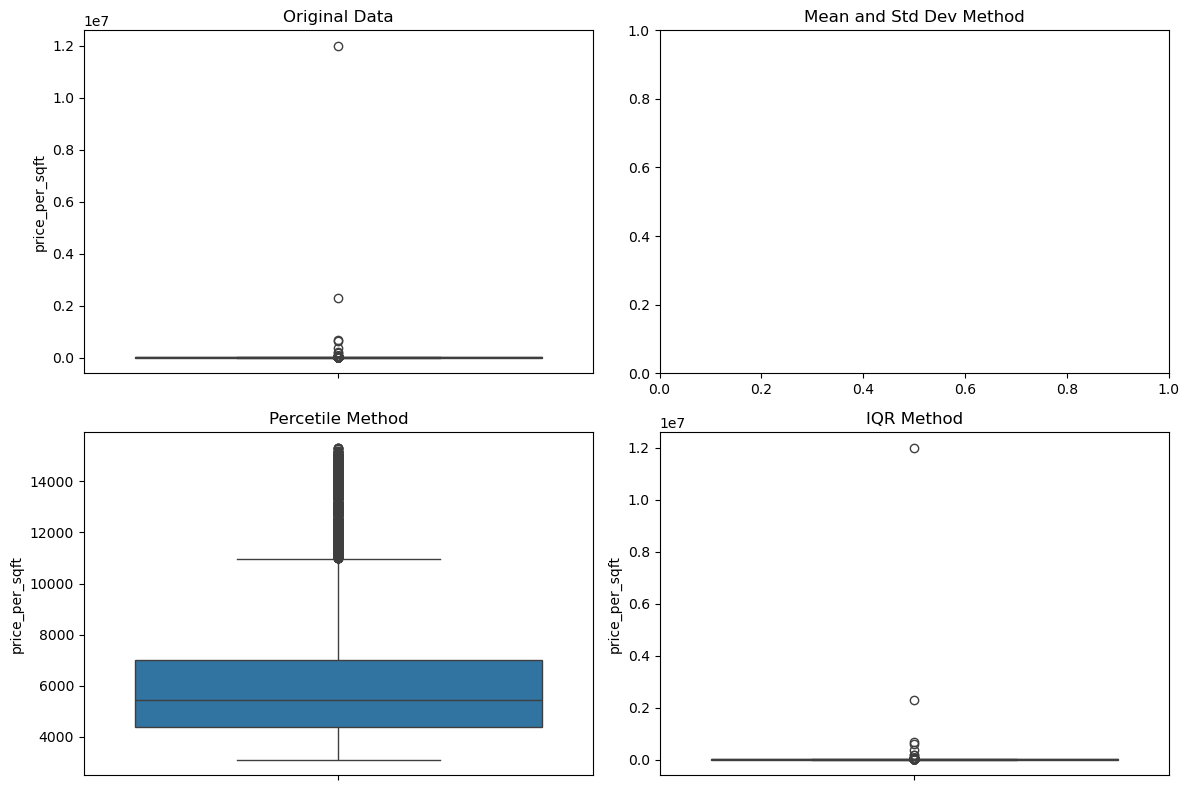

In [12]:
# creating boxplot

plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.boxplot(y=data['price_per_sqft'])
plt.title('Original Data')

plt.subplot(2,2,2,)
sns.boxplot(y=data_mean_std['price_per_sqft'])
plt.title('Mean and Std Dev Method')

plt.subplot(2,2,3)
sns.boxplot(y=data_percentile['price_per_sqft'])
plt.title('Percetile Method')

plt.subplot(2,2,4)
sns.boxplot(y=data_iqr['price_per_sqft'])
plt.title('IQR Method')

plt.tight_layout()
plt.show()




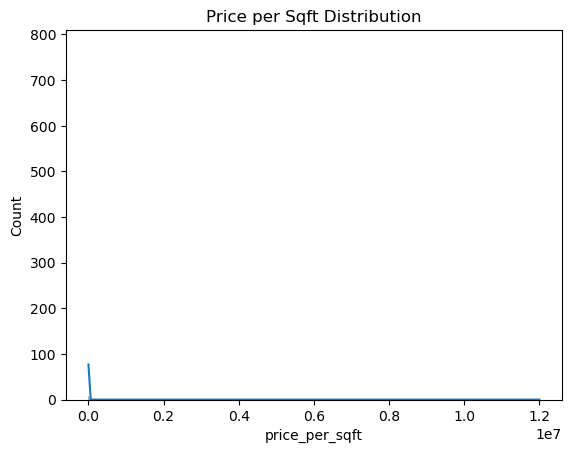

Skewness: 108.28105529705168
Kurtosis: 12095.21502832288
Skewness after log transformation: 1.4004850530059296
Kurtosis after log transformation: 9.206942162860814


In [13]:
# Checking Normality

# Histplot
sns.histplot(data['price_per_sqft'], kde=True)
plt.title('Price per Sqft Distribution')
plt.show()

# Check skewness and kurtosis
print("Skewness:", data['price_per_sqft'].skew())
print("Kurtosis:", data['price_per_sqft'].kurt())

data['price_per_sqft_log'] = np.log(data['price_per_sqft'] + 1)

# Check skewness and kurtosis after transformation
print("Skewness after log transformation:", data['price_per_sqft_log'].skew())
print("Kurtosis after log transformation:", data['price_per_sqft_log'].kurt())


In [14]:
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

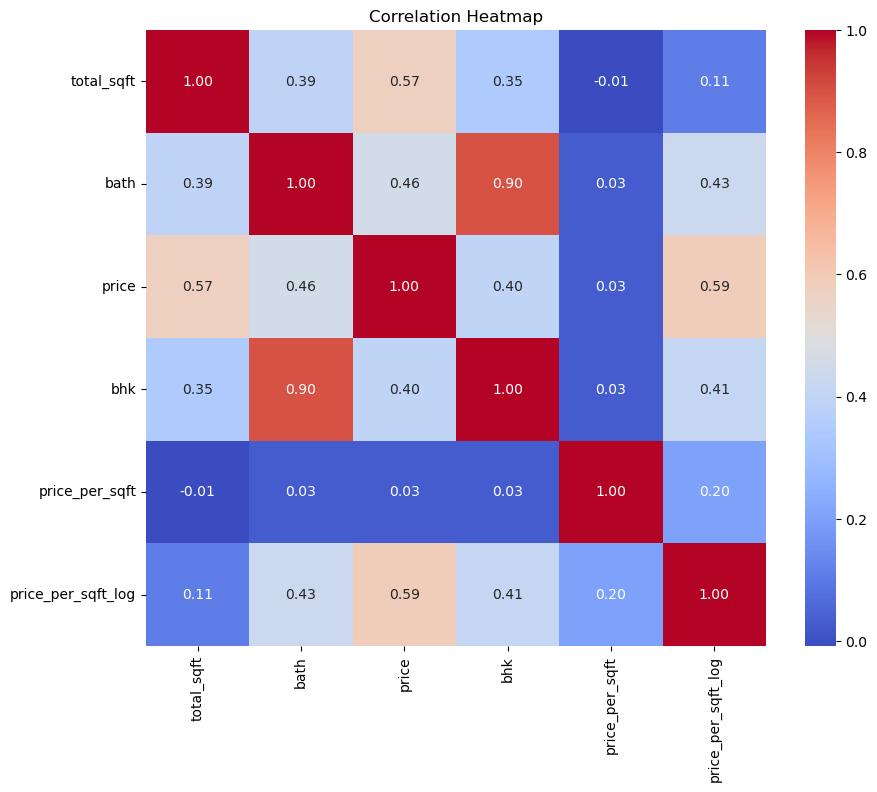

In [15]:
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Scatter plot between price_per_sqft and other numerical columns
plt.figure(figsize=(12, 8))
sns.pairplot(numeric_data)
plt.show()